<a href="https://colab.research.google.com/github/dongyyyyy/ColabDeepLearning/blob/master/MakingDeepLearningModelUsingNumpy/tensorflowExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import csv

def createRandomArray():
    result = np.random.randint(0,2,3,dtype=int)
    if(result[0]==0 and result[1]==0 and result[2] ==0):
        output = 1
    elif(result[0]==0 and result[1]==0 and result[2] == 1):
        output = 2
    elif(result[0]==0 and result[1]==1 and result[2] ==0):
        output = 3
    elif (result[0] == 0 and result[1] == 1 and result[2] == 1):
        output = 4
    elif (result[0] == 1 and result[1] == 0 and result[2] == 0):
        output = 5
    elif (result[0] == 1 and result[1] == 0 and result[2] == 1):
        output = 6
    elif (result[0] == 1 and result[1] == 1 and result[2] == 0):
        output = 7
    elif (result[0] == 1 and result[1] == 1 and result[2] == 1):
        output = 8
    noise = np.random.normal(0, 0.1, 3)
    result = result - noise
    return result , output

if __name__ == "__main__":
    saveData = []
    csvfile = open("TrainDataset.csv","w",newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(20000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

    csvfile = open("TestDataset.csv", "w", newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(1000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

In [0]:
import numpy as np
import csv

def createRandomArray():
    result = np.random.randint(0,2,3,dtype=int)
    if(result[0]==0 and result[1]==0 and result[2] ==0):
        output = 1
    elif(result[0]==0 and result[1]==0 and result[2] == 1):
        output = 2
    elif(result[0]==0 and result[1]==1 and result[2] ==0):
        output = 3
    elif (result[0] == 0 and result[1] == 1 and result[2] == 1):
        output = 4
    elif (result[0] == 1 and result[1] == 0 and result[2] == 0):
        output = 5
    elif (result[0] == 1 and result[1] == 0 and result[2] == 1):
        output = 6
    elif (result[0] == 1 and result[1] == 1 and result[2] == 0):
        output = 7
    elif (result[0] == 1 and result[1] == 1 and result[2] == 1):
        output = 8
    noise = np.random.normal(0, 0.3, 3)
    result = result - noise
    return result , output

if __name__ == "__main__":
    saveData = []
    csvfile = open("TrainDataset_03.csv","w",newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(20000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

    csvfile = open("TestDataset_03.csv", "w", newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(1000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

In [0]:
!ls

sample_data	    TestDataset.csv	 TrainDataset.csv
TestDataset_03.csv  TrainDataset_03.csv


In [0]:
import numpy as np

def HandFunction(h,f):
    result = np.array(np.zeros([len(h[0]), len(f[0])]))
    h = h.sum(axis=0)
    f = f.sum(axis=0)
    for i in range(len(h)):
        for j in range(len(f)):
            result[i][j] = h[i] * f[j]
    return result

def HandFunction1(h,f):
    result = np.array(np.zeros([len(f),len(f[0])]))
    for i in range(len(f)): # 100
        for j in range(len(f[0])): # 24
            result[i][j] = h[j] * f[i][j] # 24 , (100,24) -> (100,24)
    return result

def HandFunction2(h,f):
    result = np.array(np.zeros([len(h),len(f[0])]))
    for i in range(len(f[0])): # 24
        for j in range(len(h)): # 100
            result[j][i] = h[j] * f[j][i] # (100) , (100,24) -> (100,24)
    return result


def ODivideFunction(h,f):
    result = np.array(np.zeros([len(h), len(h[0])]))
    for i in range(len(h)): # 100
        for j in range(len(h[0])): # 8
            result[i][j] = h[i][j] / f[i]
    return result

def MakeFristOne(h):
    for i in range(len(h)):
        h[i][0] = 1.
    return h
  
def RetrunOneHot(input):
        if input == 1:
            return [1, 0, 0, 0, 0, 0, 0, 0]
        elif input == 2:
            return [0, 1, 0, 0, 0, 0, 0, 0]
        elif input == 3:
            return [0, 0, 1, 0, 0, 0, 0, 0]
        elif input == 4:
            return [0, 0, 0, 1, 0, 0, 0, 0]
        elif input == 5:
            return[0, 0, 0, 0, 1, 0, 0, 0]
        elif input == 6:
            return [0, 0, 0, 0, 0, 1, 0, 0]
        elif input == 7:
            return [0, 0, 0, 0, 0, 0, 1, 0]
        elif input == 8:
            return [0, 0, 0, 0, 0, 0, 0, 1]
        else :
          return [0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
import numpy as np
from math import exp

learning_rate = 0.001


def V_Sigmoid():
    sigmoid = np.vectorize(Sigmoid)
    return sigmoid

def V_ReLU():
    relu = np.vectorize(ReLU)
    return relu

def Sigmoid(x):
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        return 1.


def ReLU(x):
    return max(0, x)


if __name__ == "__main__":

    batch = 100
    epoch = 20
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data))]
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1)
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []
    print("데이터 총 개수 : ", len(train_y_data))
    for i in range(len(train_y_data)):
        if train_y_data[i] == 1:
            train_y_data_onehot.append([1, 0, 0, 0, 0, 0, 0, 0])
        elif train_y_data[i] == 2:
            train_y_data_onehot.append([0, 1, 0, 0, 0, 0, 0, 0])
        elif train_y_data[i] == 3:
            train_y_data_onehot.append([0, 0, 1, 0, 0, 0, 0, 0])
        elif train_y_data[i] == 4:
            train_y_data_onehot.append([0, 0, 0, 1, 0, 0, 0, 0])
        elif train_y_data[i] == 5:
            train_y_data_onehot.append([0, 0, 0, 0, 1, 0, 0, 0])
        elif train_y_data[i] == 6:
            train_y_data_onehot.append([0, 0, 0, 0, 0, 1, 0, 0])
        elif train_y_data[i] == 7:
            train_y_data_onehot.append([0, 0, 0, 0, 0, 0, 1, 0])
        elif train_y_data[i] == 8:
            train_y_data_onehot.append([0, 0, 0, 0, 0, 0, 0, 1])
    W = np.random.rand(4,8)

    def forward(x, y):

        z1 = np.dot(x,W)
        o = ODivideFunction(np.exp(z1), np.sum(np.exp(z1), axis=1))
        e = np.mean(-np.sum(y * np.log(o), axis=1))

        return e, o, z1


    def backward(x, y, W, input_data):
        local_param = (x-y)
        result = HandFunction(input_data,local_param)
        delta_o = (-learning_rate)*result
        NW = W + delta_o

        return NW

    def Accuracy(x,y,batch):
        z1 = np.dot(x,W)
        o = ODivideFunction(np.exp(z1), np.sum(np.exp(z1), axis=1))
        accuracy = 0.
        for i in range(batch):
            if (np.argmax(o[i])==np.argmax(y[i])):
                accuracy = accuracy + 1.
        return accuracy/batch * 100

    maxBatch = int(len(train_x_data_bias) / batch)
    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                Eav, error, z1 = forward(x_batch, y_batch)
                W = backward(error, y_batch, W,x_batch)
                # print(W1)
                Eavg = Eavg + Eav
                startNumber = startNumber + 100
        print("Epoch ",i+1,"Eavg : ",Eavg/maxBatch)

    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = data[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, train_x_data), axis=1)
    test_y_data = data[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    Eavg = 0.
    startNumber = 0
    Aavg = 0.
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = Accuracy(x_batch,y_batch,batch)
            Aavg = Aavg + accuracy
            startNumber = startNumber + 100
    print("Aavg : {:.4f}%".format((Aavg/len(test_x_data_bias))*100))

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.9427297312442096
Epoch  2 Eavg :  1.1478884706627688
Epoch  3 Eavg :  0.8201569427165246
Epoch  4 Eavg :  0.6487832306818427
Epoch  5 Eavg :  0.5399679957739402
Epoch  6 Eavg :  0.45849186505938627
Epoch  7 Eavg :  0.40585751013862753
Epoch  8 Eavg :  0.3669788907374947
Epoch  9 Eavg :  0.32605677813551365
Epoch  10 Eavg :  0.2850789975905618
Epoch  11 Eavg :  0.24535929164275877
Epoch  12 Eavg :  0.2093172536354702
Epoch  13 Eavg :  0.18094530624915095
Epoch  14 Eavg :  0.1606168188588763
Epoch  15 Eavg :  0.14633621978188
Epoch  16 Eavg :  0.13538347732034495
Epoch  17 Eavg :  0.12652569832717434
Epoch  18 Eavg :  0.11911511943172515
Epoch  19 Eavg :  0.11275976608919464
Epoch  20 Eavg :  0.1072040396938015
Aavg : 100.0000%


In [0]:
import numpy as np
from math import exp

learning_rate = 0.0001


def V_Sigmoid():
    sigmoid = np.vectorize(Sigmoid)
    return sigmoid

def V_ReLU():
    relu = np.vectorize(ReLU)
    return relu

def Sigmoid(x):
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        return 1.


def ReLU(x):
    return max(0, x)


if __name__ == "__main__":

    batch = 100
    epoch = 10
    startNumber = 0

    # 데이터 가져오는 작업
    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32) # 해당 txt파일에서 데이터를 가져옴
    train_x_data = data[:, 0:-1] # 열에서 가장 마지막 값을 제외한 모든 값
    bias = [[1.] * 1 for i in range(len(train_x_data))] 
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1) # bias값을 가장 맨 앞 (0)위치에 이어붙인다
    train_y_data = data[:, [-1]] # 마지막 값 ( classes )을 y data ( label )로 저장
    train_y_data_onehot = [] # y_data값은 1~8사이의 값이므로 이를 one_hot인코딩을 하여 값을 저장
    print("데이터 총 개수 : ", len(train_y_data)) 
    for i in range(len(train_y_data)):
            train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    W1 = np.random.rand(4,24) # input과 1번 layer의 연결강도를 의미하는 W1 가중치
    W2 = np.random.rand(24,8) # 1번 layer와 출력 layer의 연결강도를 의미하는 W2 가중치


    def forward(x, y):
        z1 = np.dot(x,W1)
        h1 = MakeFristOne(z1)

        z2 = np.dot(h1,W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2),axis=1))
        e = np.mean(-np.sum(y*np.log(o),axis=1))


        return e, o, h1


    def backward(x, y, W1, W2, input_data,h1): # x = O(n) , y = label , W = Weight
        local_param2 = (x - y)
        result = HandFunction(h1, local_param2)
        delta_o = (-learning_rate) * result
        NW2 = W2 + delta_o

        local_param1 = np.dot(local_param2,np.transpose(W2))
        result = HandFunction(input_data, local_param1)
        delta_h1 = (-learning_rate) * result
        NW1 = W1 + delta_h1
        
        return NW1, NW2

    def Accuracy(x, y, batch):
        z1 = np.dot(x,W1)
        h1 = MakeFristOne(z1)

        z2 = np.dot(h1,W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2),axis=1))
        accuracy = 0.
        for i in range(batch):
            if (np.argmax(o[i])==np.argmax(y[i])):
                accuracy = accuracy + 1.
                
        return float(accuracy)/batch * 100, o

    maxBatch = int(len(train_x_data_bias) / batch)
    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                Eav, error, h1 = forward(x_batch, y_batch)
                W1,W2 = backward(error, y_batch, W1,W2,x_batch,h1 )
                # print(W1)
                Eavg = Eavg + Eav
                startNumber = startNumber + 100
        print("Epoch ",i+1,"Eavg : ",Eavg/maxBatch)

    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = data[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, train_x_data), axis=1)
    test_y_data = data[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    Eavg = 0.
    startNumber = 0
    Aavg = 0.
    a = 0
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy, pred = Accuracy(x_batch,y_batch,batch)
            if( a == 0):
                print("Label : ", np.argmax(y_batch, axis=1))
                print("pred : ",np.argmax(pred,axis=1))
                a += 1
            Aavg = Aavg + accuracy
            startNumber = startNumber + 100
    print("Aavg : {}%".format((Aavg/len(test_x_data_bias))*100))

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.9682248623906162
Epoch  2 Eavg :  1.5235499577187965
Epoch  3 Eavg :  1.2503493961525591
Epoch  4 Eavg :  1.0128076655413087
Epoch  5 Eavg :  0.8078905472675921
Epoch  6 Eavg :  0.6395129041272457
Epoch  7 Eavg :  0.5073271058685926
Epoch  8 Eavg :  0.4064794008198491
Epoch  9 Eavg :  0.3303766311641861
Epoch  10 Eavg :  0.27283334984482704
Label :  [6 5 3 3 1 7 0 0 0 4 7 7 5 4 5 4 5 0 7 7 2 6 4 1 1 2 0 0 6 4 7 6 3 1 4 4 6
 2 1 7 7 0 6 3 4 2 6 2 0 0 5 3 0 4 7 5 5 3 6 2 4 2 7 5 2 7 0 1 0 7 2 1 5 5
 6 0 3 4 3 5 0 2 1 4 7 1 1 1 4 7 3 6 0 1 5 4 3 5 1 0]
pred :  [6 5 3 3 1 7 0 0 0 4 7 7 5 4 5 4 5 0 7 7 2 6 4 1 1 2 0 0 6 4 7 6 3 1 4 4 6
 2 1 7 7 0 6 3 4 2 6 2 0 0 5 3 0 4 7 5 5 3 6 2 4 2 7 5 2 7 0 1 0 7 2 1 5 5
 6 0 3 4 3 5 0 2 1 4 7 1 1 1 4 7 3 6 0 1 5 4 3 5 1 0]
Aavg : 100.0%


In [0]:
import numpy as np
from math import exp


learning_rate = 0.0001 # learning rate

plt_Eavg = [] 
plt_Eavg2 = []

class Model:
    def __init__(self, batch): # 클래스 생성시 초기화
        self.W1 = np.random.rand(4,24) 
        self.W2 = np.random.rand(24,8)
        self.h1 = np.random.rand(batch, 24)

    def forward(self, input_data, input_truth): # 전 방향 
        z1 = np.dot(input_data, self.W1)
        self.h1 = MakeFristOne(z1)

        z2 = np.dot(self.h1, self.W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2),axis=1))
        e = np.mean(-np.sum(input_truth*np.log(o),axis=1))

        return e, o

    def backward(self, pred, truth, input_data): # x = O(n) , y = label , W = Weight / backpropagation
        local_param2 = (pred - truth) # 국부적 기울기
        result = np.dot(np.transpose(self.h1), local_param2) # 국부적 기울기 * h1
        delta_o = (-learning_rate) * result # W2 변화량
        nw2 = self.W2 + delta_o # 다음 W2 = 현재 W2 + W2의 변화량

        local_param1 = np.dot(local_param2, np.transpose(self.W2)) # 국부적 기울기
        result = HandFunction(input_data, local_param1) # 국부적 기울기 * 입력값
        delta_h1 = (-learning_rate) * result # W1 변화량
        nw1 = self.W1 + delta_h1 # 다음 W1 = 현재 W1 + W1의 변화량

        self.W1 = nw1
        self.W2 = nw2

    def Accuracy(self, input_data, input_truth, batch): # 정확도 확인을 위한 함수
        z1 = np.dot(input_data, self.W1)
        h1 = MakeFristOne(z1)

        z2 = np.dot(h1, self.W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2), axis=1))
        accuracy = 0.
        for i in range(batch):
            if np.argmax(o[i]) == np.argmax(input_truth[i]): # truth와 pred이 일치할 경우
                accuracy = accuracy + 1.

        return accuracy/batch * 100, o

if __name__ == "__main__":

    batch = 100 # mini-batch size 한번에 100개의 이미지를 학습한 후 update
    epoch = 10 # 전체의 이미지 수를 10번 만큼 반복 학습
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32) # 데이터 가져오기 
    train_x_data = data[:, 0:-1] # 맨 마지막 전까지의 데이터를 X 데이터 ( 입력 데이터 )
    bias = [[1.] * 1 for i in range(len(train_x_data))] # 입력 데이터에도 bias값 (+1)을 추가하기 위한 리스트 선언
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1) # 입력 데이터에 bias값 추가
    train_y_data = data[:, [-1]] # 마지막 데이터를 y 데이터 ( 정답 )
    train_y_data_onehot = [] # one_hot encoding을 통하여 데이터 변형

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data_03 = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data_03))]
    train_x_data_03_bias = np.concatenate((bias, train_x_data_03), axis=1)
    train_y_data_03 = data[:, [-1]]
    train_y_data_03_onehot = []


    print("데이터 총 개수 : ", len(train_y_data_03))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    for i in range(len(train_y_data_03)):
        train_y_data_03_onehot.append(RetrunOneHot(train_y_data_03[i]))

    maxBatch = int(len(train_x_data_03_bias) / batch)

    m1 = Model(batch) # 클래스 생성
    m2 = Model(batch) # 클래스 생성

    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        Eavg2 = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복 = 20000 / batch(100)
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            x_batch2 = train_x_data_03_bias[startNumber:startNumber + 100]
            y_batch2 = train_y_data_03_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                Eav, pred = m1.forward(x_batch, y_batch) # forward
                m1.backward(pred, y_batch, x_batch) # backward

                Eav2, pred2 = m2.forward(x_batch2, y_batch2)
                m2.backward(pred2, y_batch2, x_batch2)

                Eavg = Eavg + Eav
                Eavg2 = Eavg2 + Eav2
                startNumber = startNumber + 100
        print("Epoch ", i + 1, "Eavg : ", Eavg/maxBatch)
        plt_Eavg.append(Eavg/maxBatch) 
        print("Epoch ", i + 1, "Eavg2 : ", Eavg2 / maxBatch)
        plt_Eavg2.append(Eavg2/maxBatch)
    
    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = test[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, test_x_data), axis=1)
    test_y_data = test[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    test = np.loadtxt('TestDataset_03.csv', delimiter=',', dtype=np.float32)
    test_x_data_03 = test[:, 0:-1]
    test_x_data_03_bias = np.concatenate((test_bias, test_x_data_03), axis=1)
    test_y_data_03 = test[:, [-1]]
    test_y_data_03_onehot = []

    for i in range(len(test_y_data_03)):
        test_y_data_03_onehot.append(RetrunOneHot(test_y_data_03[i]))

    startNumber = 0
    Aavg = 0.
    Aavg2 = 0.
    a = 0
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        x_batch2 = test_x_data_03_bias[startNumber:startNumber+batch]
        y_batch2 = test_y_data_03_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy, pred = m1.Accuracy(x_batch, y_batch, batch)
            accuracy2, pred2 = m2.Accuracy(x_batch2, y_batch2, batch)
            if(a == 0):
                print("Label : ", np.argmax(y_batch, axis=1))
                print("pred : ", np.argmax(pred, axis=1))
                a += 1
            Aavg = Aavg + accuracy
            Aavg2 = Aavg2 + accuracy2
            startNumber = startNumber + 100

    print("Aavg : {}%".format((float(Aavg)/len(test_x_data_bias))*100))

    print("Aavg2 : {:.4f}%".format((float(Aavg2) / len(test_x_data_03_bias))*100))

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.9132085987785168
Epoch  1 Eavg2 :  2.016058722780397
Epoch  2 Eavg :  1.4258134454612665
Epoch  2 Eavg2 :  1.458683615679732
Epoch  3 Eavg :  1.080525890011097
Epoch  3 Eavg2 :  1.1447244671054322
Epoch  4 Eavg :  0.8121696910014606
Epoch  4 Eavg2 :  0.9400854617884339
Epoch  5 Eavg :  0.6109155234282934
Epoch  5 Eavg2 :  0.8028112942586452
Epoch  6 Eavg :  0.4660531673170476
Epoch  6 Eavg2 :  0.7082725499719669
Epoch  7 Eavg :  0.36346287469265626
Epoch  7 Eavg2 :  0.641116099964532
Epoch  8 Eavg :  0.29039511034207505
Epoch  8 Eavg2 :  0.5919061057383048
Epoch  9 Eavg :  0.237430325935554
Epoch  9 Eavg2 :  0.5548166641587265
Epoch  10 Eavg :  0.1981797823194908
Epoch  10 Eavg2 :  0.5261715814239927
Label :  [6 7 4 7 7 2 4 0 3 7 2 4 1 0 3 6 7 5 2 6 0 0 2 3 0 1 6 3 0 0 2 2 2 4 2 1 6
 0 6 4 2 3 6 0 4 0 5 4 7 5 2 7 0 5 0 2 7 3 4 2 5 5 7 5 7 0 3 1 7 3 7 2 0 4
 0 3 4 2 4 7 2 1 2 7 5 6 0 6 3 2 2 6 3 7 6 2 7 1 4 6]


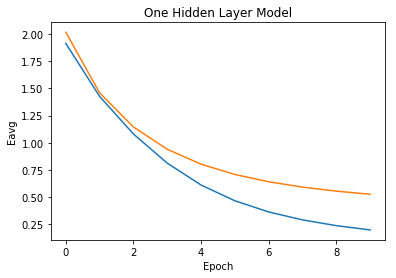

In [0]:
import matplotlib.pyplot as plt


x = range(0,10)

plt.xlabel('Epoch')
plt.ylabel('Eavg')

plt.title('One Hidden Layer Model')
plt.plot(x,plt_Eavg,label= "Noise=0.1")
plt.plot(x,plt_Eavg2,label = 'Noise=0.3')
plt.show()
